# Analysis of King County bike infractions for Central Seattle Greenways

#### Ethan C. Campbell

For questions, contact me at ethanchenbell@gmail.com.

In [3]:
%matplotlib inline
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from datetime import datetime, timedelta
import glob

from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
# load annual bike infraction data transcribed from Seattle Municipal Court online table (some of this data since purged from online)
seattle_summaries = pd.read_excel('/Users/Ethan/Documents/Finances and records/2020-06-30 - Central Seattle Greenways/2020-07-18 - Seattle Municipal Court bike violations (transcribed from online table).xlsx',
                                 index_col=0)
display(seattle_summaries)

,"Bicycle Helmet Required (9.10.010, 9.15.010)",Rider Rights/Duties Violation (11.44.020),R/W in Crosswalk (11.44.100),Riding on Road Rules Violation (11.44.040),No/Improper Lamps/Reflectors (11.44.160),Yield R/W on Public Path (11.44.120),No/Improper Hand Signals (11.44.140),Unsafe Pass on Right (11.44.080),No/Improper Brakes (11.44.200),Ride More Than 2 Abreast Road/Sidewalk (11.44.060),Clinging/Attaching to Vehicle (11.44.240),Control (11.44.260)
Year,,,,,,,,,,,,
2011,607,140,11,4,13,6,1,4,0,0,1,2
2012,306,124,11,3,14,1,2,2,0,0,1,1
2013,341,197,7,2,10,1,2,4,0,0,0,0
2014,168,108,4,2,4,4,1,1,0,0,0,1
2015,76,81,6,3,6,3,0,5,0,0,1,0
2016,41,71,4,2,6,1,1,2,0,0,0,0
2017,33,34,9,3,6,2,3,3,1,0,0,0
2018,46,78,5,6,7,3,4,5,0,1,0,0
2019,29,65,7,6,4,2,2,1,1,0,0,1


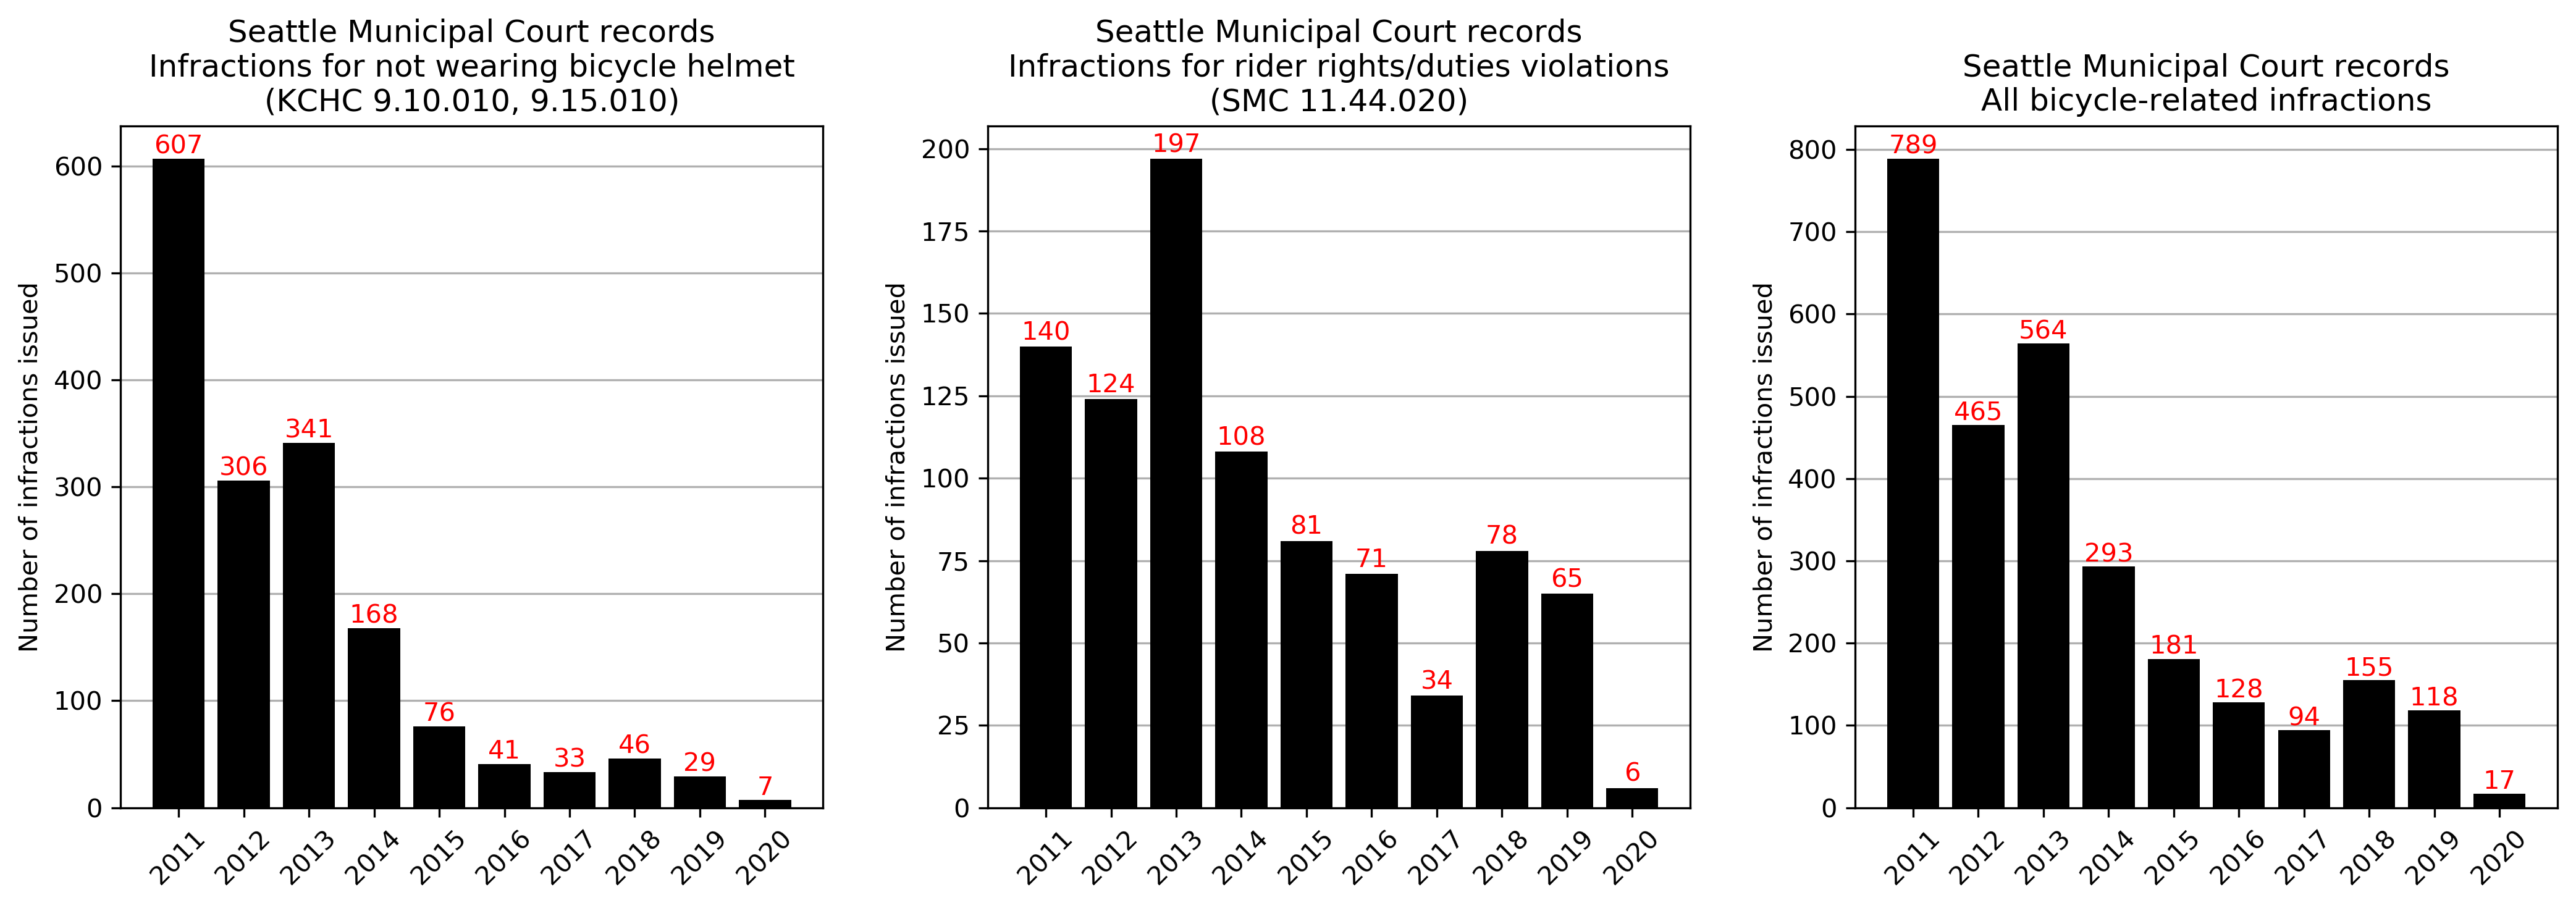

In [5]:
# plot annual data for selected Seattle bike infractions

x = seattle_summaries['Bicycle Helmet Required (9.10.010, 9.15.010)'].index
y = seattle_summaries['Bicycle Helmet Required (9.10.010, 9.15.010)'].values
plt.figure(figsize=(14,5),facecolor='w')
plt.subplot(1,3,1)
plt.grid(axis='y',zorder=1)
plt.bar(x,y,color='k',zorder=2)
plt.xticks(x,rotation=45)
plt.ylabel('Number of infractions issued')
plt.title('Seattle Municipal Court records\nInfractions for not wearing bicycle helmet\n(KCHC 9.10.010, 9.15.010)')
for i, y_val in enumerate(y):
    plt.text(x[i],y_val+5,str(y_val),c='r',fontweight='regular',horizontalalignment='center')

x = seattle_summaries['Rider Rights/Duties Violation (11.44.020)'].index
y = seattle_summaries['Rider Rights/Duties Violation (11.44.020)'].values
plt.subplot(1,3,2)
plt.grid(axis='y',zorder=1)
plt.bar(x,y,color='k',zorder=2)
plt.xticks(x,rotation=45)
plt.ylabel('Number of infractions issued')
plt.title('Seattle Municipal Court records\nInfractions for rider rights/duties violations\n(SMC 11.44.020)')
for i, y_val in enumerate(y):
    plt.text(x[i],y_val+2,str(y_val),c='r',fontweight='regular',horizontalalignment='center')
 
if 'Total' in seattle_summaries: del seattle_summaries['Total']
seattle_summaries['Total'] = seattle_summaries.sum(axis=1)
x = seattle_summaries['Total'].index
y = seattle_summaries['Total'].values
plt.subplot(1,3,3)
plt.grid(axis='y',zorder=1)
plt.bar(x,y,color='k',zorder=2)
plt.xticks(x,rotation=45)
plt.ylabel('Number of infractions issued')
plt.title('Seattle Municipal Court records\nAll bicycle-related infractions')
for i, y_val in enumerate(y):
    plt.text(x[i],y_val+6,str(y_val),c='r',fontweight='regular',horizontalalignment='center')
plt.tight_layout()

In [32]:
# load Seattle Municipal Court infraction records from 2017-2020
seattle_mc_new = pd.read_excel('/Users/Ethan/Documents/Finances and records/2020-06-30 - Central Seattle Greenways/2020-07-16 - Seattle Municipal Court bicycle violations (2017-01-01 to 2020-06-30).xlsx',
                               index_col=None,parse_dates=[0,1])
seattle_mc_new['Defendant Race'] = seattle_mc_new['Defendant Race'].fillna('U')   # handle entries missing Defendant Race information
display(seattle_mc_new)

# extract helmet violations into separate sheet
seattle_mc_new_helmet = seattle_mc_new[seattle_mc_new['Violation Description'] == 'BICYCLE HELMET REQUIRED'].copy()

#####

# load Seattle Municipal Court infraction records from 2003-2016 (incomplete due to purge schedule)
seattle_mc_old = pd.read_excel('/Users/Ethan/Documents/Finances and records/2020-06-30 - Central Seattle Greenways/2020-07-20 - Seattle Municipal Court bicycle violations (2003-01-01 to 2016-12-31).xlsx',
                               index_col=None,parse_dates=[0,1])
seattle_mc_old['Defendant Race'] = seattle_mc_old['Defendant Race'].fillna('U')   # handle entries missing Defendant Race information
display(seattle_mc_old)

# extract helmet violations into separate sheet
seattle_mc_old_helmet = seattle_mc_old[seattle_mc_old['Violation Description'] == 'BICYCLE HELMET REQUIRED'].copy()

#####

# merge old and new data
seattle_mc_combined = pd.concat([seattle_mc_old,seattle_mc_new])
seattle_mc_combined_helmet = pd.concat([seattle_mc_old_helmet,seattle_mc_new_helmet])

,Violation Date,Filing Date,Citation Number,Violation Code,Violation Description,Violation Time,Violation Location,Officer First Name,Officer Middle Initial,Officer Last Name,Officer Number,Defendant Race,Defendant Gender
0,2017-01-09,2017-01-10,12915476,KCHC9.10.010,BICYCLE HELMET REQUIRED,1330,NaN,JAMES,NaN,OLSON,7316,U,M
1,2017-01-09,2017-01-10,12915476,KCHC9.10.010,BICYCLE HELMET REQUIRED,1330,NaN,CHRISTOPHER,J,MYERS,7601,U,M
2,2017-01-16,2017-01-17,12922381,SMC11.44.160,BIKE NO/IMPROPER LAMPS/REFLECTORS,638,NaN,JOHN,D,RANDLE,8337,W,M
3,2017-01-15,2017-01-17,12922380,SMC11.44.020,BIKE RIDER RIGHTS/DUTIES VIOLATION,542,NaN,JOHN,D,RANDLE,8337,W,M
4,2017-01-29,2017-02-01,12921049,SMC11.44.160,BIKE NO/IMPROPER LAMPS/REFLECTORS,1835,NaN,FRANKLIN,D,POBLOCKI,6613,W,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,2020-05-19,2020-06-23,12948137,SMC11.44.020,BIKE RIDER RIGHTS/DUTIES VIOLATION,1732,NaN,PRESTON,J,TURK,8468,W,M
443,2020-04-27,2020-06-23,12982637,KCHC9.10.010,BICYCLE HELMET REQUIRED,1537,NaN,ALEX,J,PRATT,7643,W,M
444,2020-04-27,2020-06-23,12982637,KCHC9.10.010,BICYCLE HELMET REQUIRED,1537,NaN,DAVID,S,WARNOCK,8389,W,M
445,2020-05-01,2020-06-23,12947249,KCHC9.10.010,BICYCLE HELMET REQUIRED,1708,NaN,SEAN,D,CULBERTSON,7662,W,M


,Violation Date,Filing Date,Citation Number,Violation Code,Violation Description,Violation Time,Violation Location,Officer First Name,Officer Middle Initial,Officer Last Name,Officer Number,Defendant Race,Defendant Gender
0,2003-02-03,2003-02-05,10168275,11.44.020,RIGHTS AND DUTIES OF RIDERS,0,NaN,4438,DEBORAH,D,BROOKS,W,M
1,2003-02-04,2003-02-05,10415746,11.44.020,RIGHTS AND DUTIES OF RIDERS,1055,NaN,4253,ALAN,P,CARR,U,M
2,2003-03-02,2003-03-03,1065971,11.44.040,"BIKE, RIDE ON ROAD",225,NaN,6167,CHAD,D,ZENTNER,B,M
3,2003-03-02,2003-03-03,1065971,11.44.040,"BIKE, RIDE ON ROAD",225,NaN,6264,JON,A,ENGSTROM,B,M
4,2003-03-02,2003-03-03,1065971,11.44.160,"BIKE, LAMPS/REFLECTORS",225,NaN,6167,CHAD,D,ZENTNER,B,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,2016-11-08,2016-11-09,12923672,SMC11.44.160,BIKE NO/IMPROPER LAMPS/REFLECTORS,2035,NaN,7726,JARED,D,LEVITT,B,M
2971,2016-11-08,2016-11-14,12916028,SMC11.44.020,BIKE RIDER RIGHTS/DUTIES VIOLATION,1615,NaN,8354,JUSTIN,T,O'DELL,B,M
2972,2016-12-01,2016-12-06,12900828,SMC11.44.020,BIKE RIDER RIGHTS/DUTIES VIOLATION,1608,NaN,7775,CAROLINE,D,OSKAM,W,M
2973,2016-12-08,2016-12-08,6Z1182465,SMC11.44.020,BIKE RIDER RIGHTS/DUTIES VIOLATION,1311,900 BLOCK OF E PIKE ST,7723,DEVLIN,A,CAREY,U,M


In [7]:
# define function to load US Census Bureau American Community Survey (ACS) demographic data

# data obtained from, e.g. for Seattle: https://data.census.gov/cedsci/table?q=Seattle%20city,%20Washington&g=1600000US5363000&hidePreview=true&tid=ACSDP5Y2018.DP05&table=DP05
# note this grouping of racial categories is with probable phenotypical presentation in mind:
#    - 'Black' includes those listed in 'Two or more races' as 'Black and White' and 'Black and Native American'
#    - 'Asian_PacIs' includes those listed in 'Two or more races' as 'Asian and White'
#    - 'NativeAm_AlaskanNat' includes those listed in 'Two or more races' as 'Native American and White'

def load_census(city_abbrev,span,years=arange(2010,2018+1)):
    """
    Args:
        city_abbrev: e.g. 'Seattle', 'Federal_Way', etc.
        span: ACS span in years (1 or 5)
        years: ACS year or years to load (exact year for ACS 1-year or final year for ACS 5-year, e.g. 2010 for 2006-2010)
    """
    root_dir = '/Users/Ethan/Documents/Finances and records/2020-06-30 - Central Seattle Greenways/2020-07-18 - US Census Bureau American Community Survey (ACS) data/'
    city_dir = '{0}_ACS_{1}_yr/'.format(city_abbrev,span)
    if type(years) == int: years = [years]
    census_data = pd.DataFrame(index=years,columns=['Total_population','Asian_PacIs','Black','NativeAm_AlaskanNat','White','Other'])
    for year in years:
        filename_wildcard = 'ACSDP{0}Y{1}.DP05_data*.csv'.format(span,year)
        filename = glob.glob(root_dir + city_dir + filename_wildcard)[0]
        raw_census_data = pd.read_csv(filename,header=1)
        if 'Percent!!RACE!!One race!!Asian' in raw_census_data.columns:
            header = 'Percent!!RACE!!'
        else:
            header = 'Percent Estimate!!RACE!!Total population!!'
        tot_pop = raw_census_data['Estimate!!RACE!!Total population'].values[0]
        api_percent = raw_census_data[header + 'One race!!Asian'].values[0] + \
                      raw_census_data[header + 'One race!!Native Hawaiian and Other Pacific Islander'].values[0] + \
                      raw_census_data[header + 'Two or more races!!White and Asian'].values[0]
        black_percent = raw_census_data[header + 'One race!!Black or African American'].values[0] + \
                        raw_census_data[header + 'Two or more races!!White and Black or African American'].values[0] + \
                        raw_census_data[header + 'Two or more races!!Black or African American and American Indian and Alaska Native'].values[0]
        natam_percent = raw_census_data[header + 'One race!!American Indian and Alaska Native'].values[0] + \
                        raw_census_data[header + 'Two or more races!!White and American Indian and Alaska Native'].values[0]
        white_percent = raw_census_data[header + 'One race!!White'].values[0]
        other_percent = 100.0 - api_percent - black_percent - natam_percent - white_percent
        if other_percent < 0.0: print('Uh oh... summed total of racial percentages is greater than 100%')
        census_data.loc[year] = {'Total_population':tot_pop,'Asian_PacIs':api_percent,'Black':black_percent,
                                 'NativeAm_AlaskanNat':natam_percent,'White':white_percent,'Other':other_percent}
    if span == 5: census_data['5_yr_period'] = ['{0}-{1}'.format(yr-4,yr) for yr in census_data.index]
    return census_data

In [8]:
# load racial statistics from SDOT 2013 Bicycle Participation Phone Survey
# data information and access:
#     - https://www.seattle.gov/transportation/projects-and-programs/programs/bike-program/bike-data
#     - https://www.seattle.gov/Documents/Departments/SDOT/BikeProgram/13-5004bikesdotcrosstab.pdf

sdot_survey = pd.read_excel('/Users/Ethan/Documents/Finances and records/2020-06-30 - Central Seattle Greenways/2020-07-18 - SDOT 2013 Bicycle Participation Phone Survey - racial statistics.xlsx',
                            index_col=0)
sdot_survey

,Percent riding a few times per year,Number riding a few times per year,Percent riding a few times per month or more,Number riding a few times per month or more,Average percent
Race/ethnicity,,,,,
All,100,69.00,100,110.0,100.0
Black,5,3.45,4,4.4,4.5
White,72,49.68,80,88.0,76.0
Hispanic,2,1.38,2,2.2,2.0
Asian,18,12.42,11,12.1,14.5
Other,2,1.38,4,4.4,3.0
Refuse,1,0.69,0,0.0,0.5
White_Hispanic,74,51.06,82,90.2,78.0
Residual,3,2.07,3,3.3,3.0


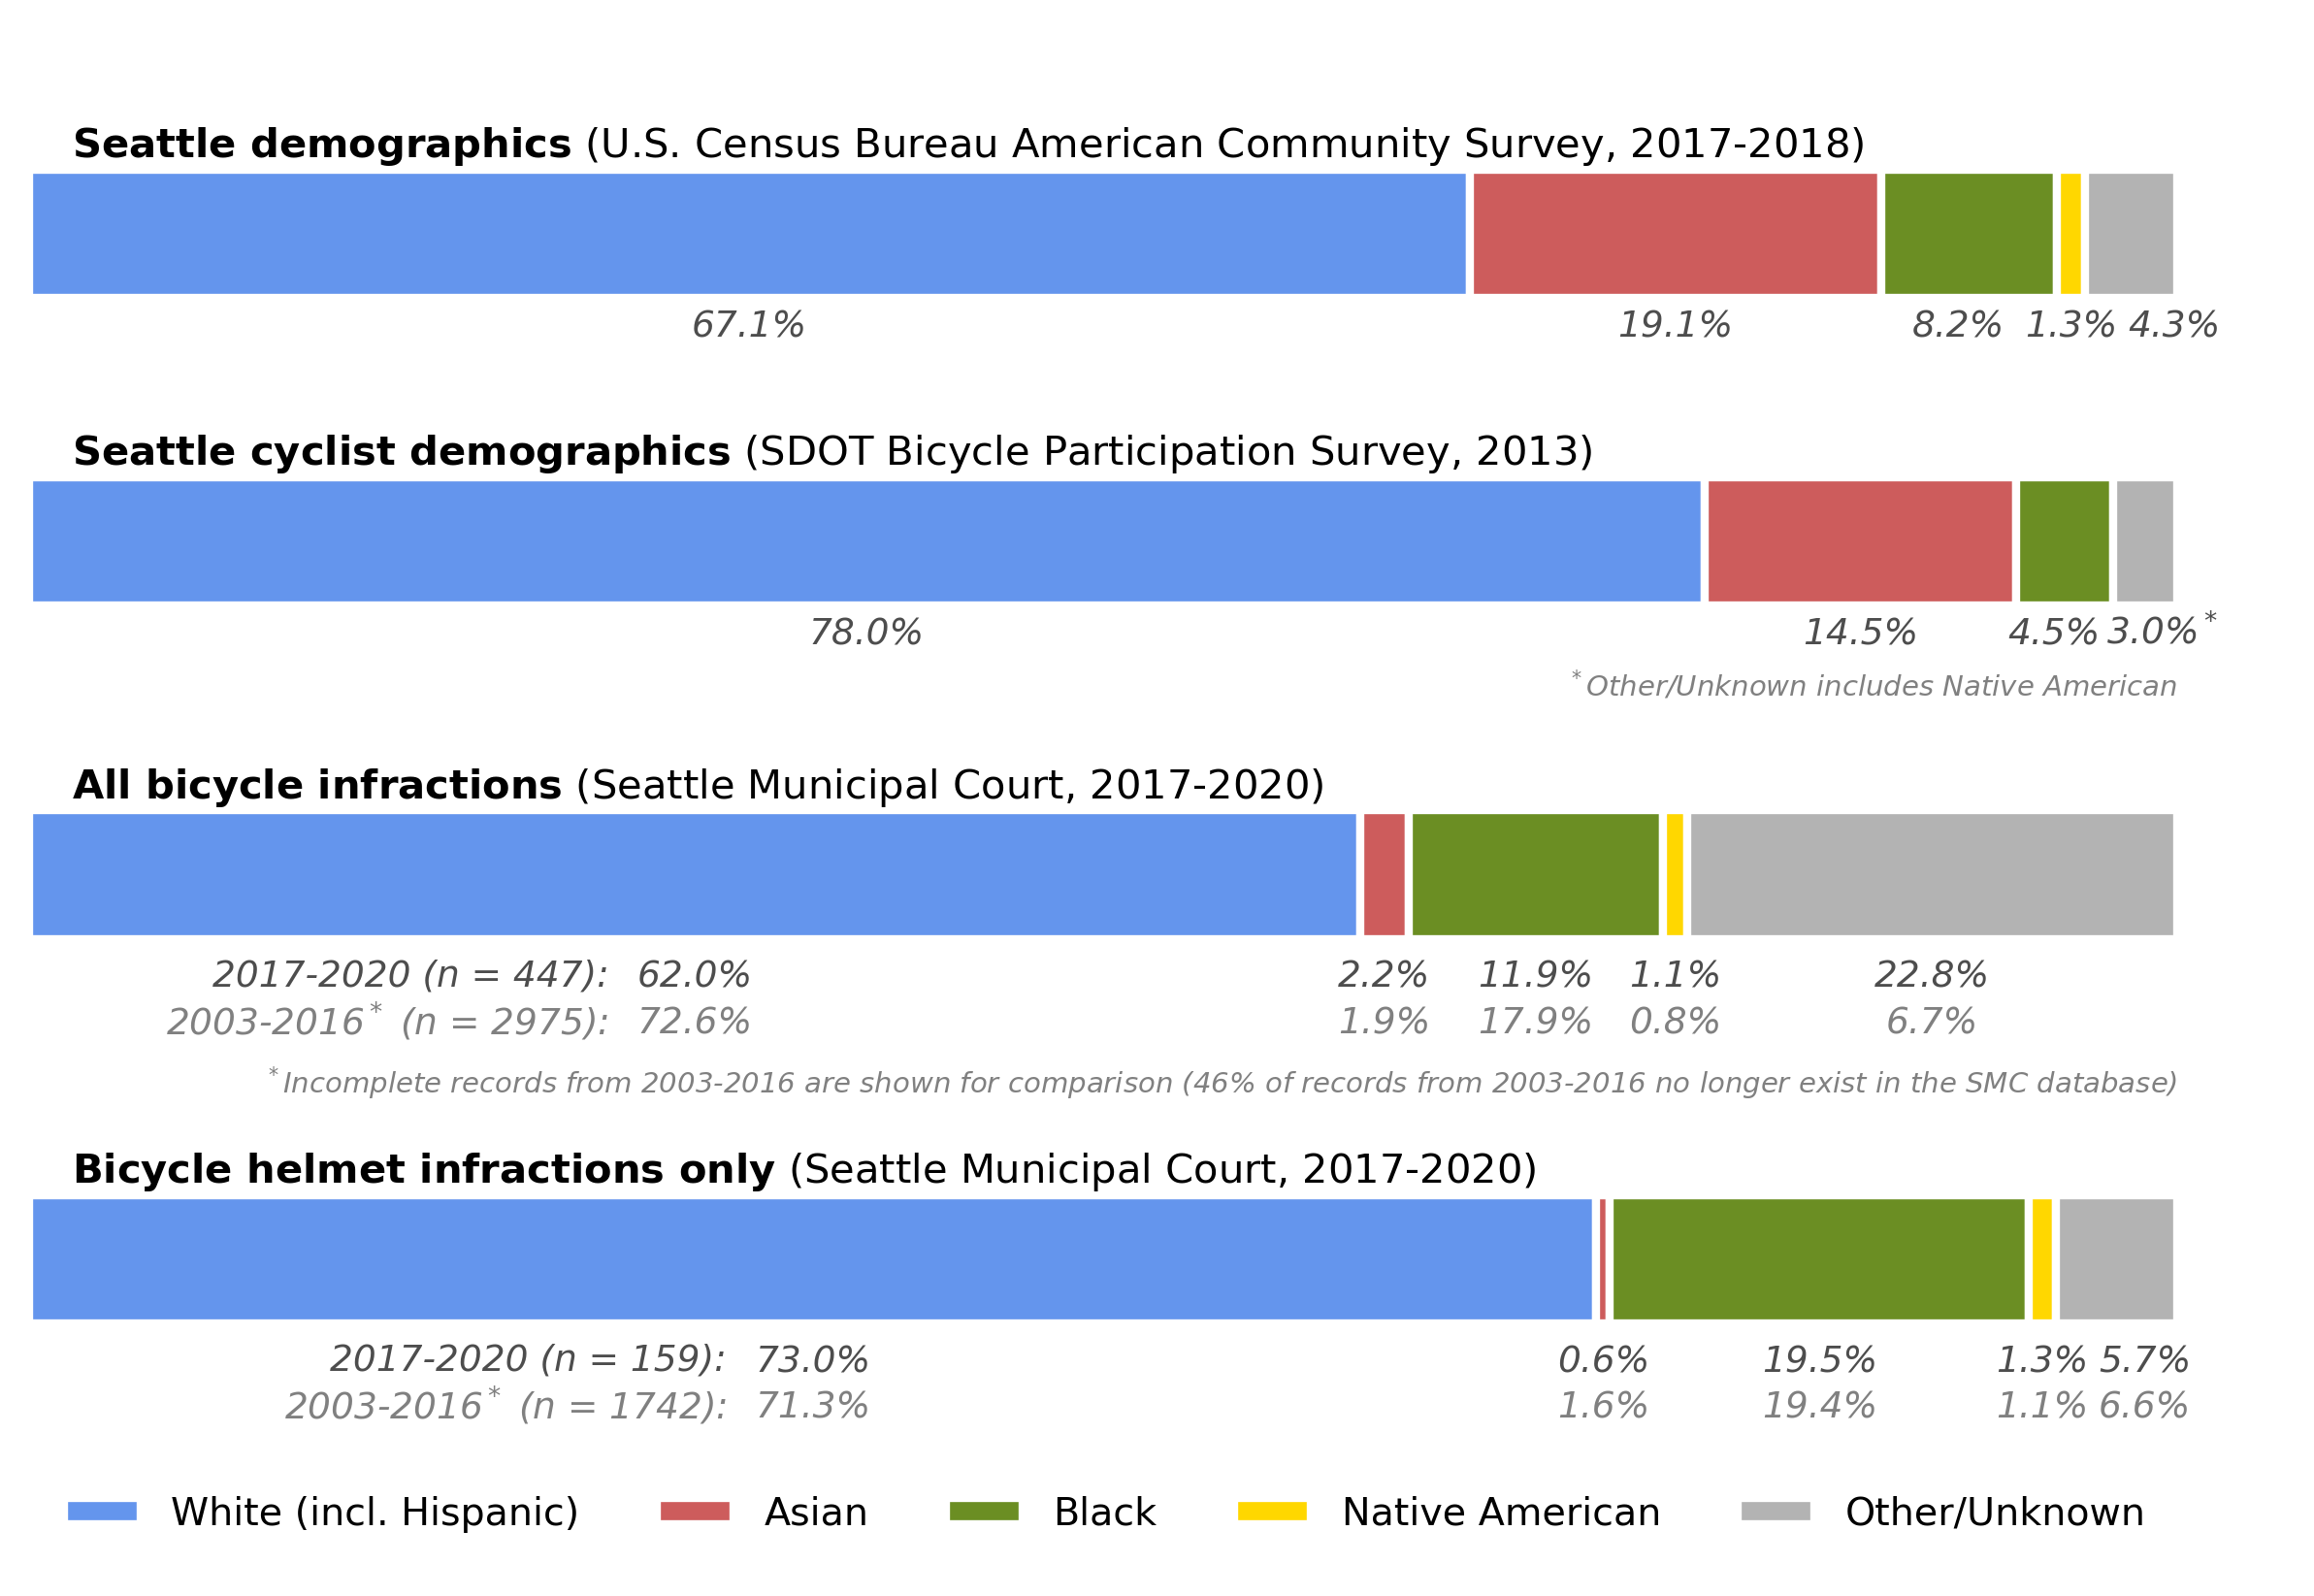

In [101]:
# plot comparison of Seattle bike infraction data, Seattle demographics, and Seattle cyclist demographics

plt.figure(figsize=(10,7),facecolor='w')

seattle_census = load_census('Seattle',1).loc[2017:2018].mean()
labels = ['White (incl. Hispanic)','Asian','Black','Native American','Other/Unknown']
colors = ['cornflowerblue','indianred','olivedrab','gold','0.7']
bump_label = [0,0,-0.5,0,2.0]
label_star = [0,0,0,0,0]
y_baseline = 5.2
widths = array([seattle_census['White'],
                seattle_census['Asian_PacIs'],
                seattle_census['Black'],
                seattle_census['NativeAm_AlaskanNat'],
                seattle_census['Other']])
h2 = plt.barh(y_baseline,widths,height=0.5,left=array([0,*cumsum(widths)[:-1]]),color=colors,edgecolor='w',linewidth=2.0)
for w_idx, w in enumerate(widths):
    plt.text(array([0,*cumsum(widths)[:-1]])[w_idx] + w/2 + bump_label[w_idx], y_baseline-0.4,'{0:.1f}%{1}'.format(w,'*'*label_star[w_idx]),
             horizontalalignment='center',fontstyle='italic',color='0.3',fontsize=9)
plt.text(2,y_baseline+0.3,r'$\bf{Seattle~demographics}$ (U.S. Census Bureau American Community Survey, 2017-2018)')

labels = ['White (incl. Hispanic)','Asian','Black','Other/Unknown']  # Other includes Native American here
colors = ['cornflowerblue','indianred','olivedrab','0.7']
bump_label = [0,0,-.5,.8]
label_star = [0,0,0,1]
y_baseline = 4.0
widths = array([sdot_survey['Average percent'].loc['White_Hispanic'],
                sdot_survey['Average percent'].loc['Asian'],
                sdot_survey['Average percent'].loc['Black'],
                sdot_survey['Average percent'].loc['Residual']])
h1 = plt.barh(y_baseline,widths,height=0.5,left=array([0,*cumsum(widths)[:-1]]),color=colors,edgecolor='w',linewidth=2.0)
for w_idx, w in enumerate(widths):
    plt.text(array([0,*cumsum(widths)[:-1]])[w_idx] + w/2 + bump_label[w_idx], y_baseline-0.4,'{0:.1f}%{1}'.format(w,'$^*$'*label_star[w_idx]),
             horizontalalignment='center',fontstyle='italic',color='0.3',fontsize=9)
plt.text(2,y_baseline+0.3,r'$\bf{Seattle~cyclist~demographics}$ (SDOT Bicycle Participation Survey, 2013)')
plt.text(100,y_baseline-0.6,'$^*$Other/Unknown includes Native American',
         fontstyle='italic',horizontalalignment='right',color='0.5',fontsize=7)

labels = ['White (incl. Hispanic)','Asian','Black','Native American','Other/Unknown']
colors = ['cornflowerblue','indianred','olivedrab','gold','0.7']
bump_label = [0,0,0,0,0]
label_star = [0,0,0,0,0]
y_baseline = 2.7
widths = array([100 * sum(seattle_mc_new['Defendant Race'] == 'W') / len(seattle_mc_new),
                100 * sum(seattle_mc_new['Defendant Race'] == 'A') / len(seattle_mc_new),
                100 * sum(seattle_mc_new['Defendant Race'] == 'B') / len(seattle_mc_new),
                100 * sum(seattle_mc_new['Defendant Race'] == 'I') / len(seattle_mc_new),
                100 * sum(seattle_mc_new['Defendant Race'] == 'U') / len(seattle_mc_new)])
widths_old = array([100 * sum(seattle_mc_old['Defendant Race'] == 'W') / len(seattle_mc_old),
                    100 * sum(seattle_mc_old['Defendant Race'] == 'A') / len(seattle_mc_old),
                    100 * sum(seattle_mc_old['Defendant Race'] == 'B') / len(seattle_mc_old),
                    100 * sum(seattle_mc_old['Defendant Race'] == 'I') / len(seattle_mc_old),
                    100 * sum(seattle_mc_old['Defendant Race'] == 'U') / len(seattle_mc_old)])
h3 = plt.barh(y_baseline,widths,height=0.5,left=array([0,*cumsum(widths)[:-1]]),color=colors,edgecolor='w',linewidth=2.0)
for w_idx, w in enumerate(widths):
    plt.text(array([0,*cumsum(widths)[:-1]])[w_idx] + widths[w_idx]/2 + bump_label[w_idx], y_baseline-0.4,'{0:.1f}%{1}'.format(w,'*'*label_star[w_idx]),
             horizontalalignment='center',verticalalignment='center',fontstyle='italic',color='0.3',fontsize=9)
for w_idx, w in enumerate(widths_old):
    plt.text(array([0,*cumsum(widths)[:-1]])[w_idx] + widths[w_idx]/2 + bump_label[w_idx], y_baseline-0.58,'{0:.1f}%{1}'.format(w,'*'*label_star[w_idx]),
             horizontalalignment='center',verticalalignment='center',fontstyle='italic',color='0.5',fontsize=9)
plt.text(2,y_baseline+0.3,r'$\bf{All~bicycle~infractions}$ (Seattle Municipal Court, 2017-2020)')
plt.text(widths[0]/2 - 4,y_baseline-0.395,'2017-2020 (n = {0}):'.format(len(seattle_mc_new)),
         style='italic',horizontalalignment='right',verticalalignment='center',color='0.3',fontsize=9)
plt.text(widths[0]/2 - 4,y_baseline-0.57,'2003-2016$^*$ (n = {0}):'.format(len(seattle_mc_old)),
         style='italic',horizontalalignment='right',verticalalignment='center',color='0.5',fontsize=9)
percent_missing = 100 * (1 - len(seattle_mc_old)/(sum(seattle_hist_all.loc[2003:2016])))
plt.text(100,y_baseline-0.85,'$^*$Incomplete records from 2003-2016 are shown for comparison ({0:.0f}% of records from 2003-2016 no longer exist in the SMC database)'.format(percent_missing),
         fontstyle='italic',horizontalalignment='right',color='0.5',fontsize=7)

bump_label = [0,0,0,0,1.3]
label_star = [0,0,0,0,0]
y_baseline = 1.2
widths = array([100 * sum(seattle_mc_new_helmet['Defendant Race'] == 'W') / len(seattle_mc_new_helmet),
                100 * sum(seattle_mc_new_helmet['Defendant Race'] == 'A') / len(seattle_mc_new_helmet),
                100 * sum(seattle_mc_new_helmet['Defendant Race'] == 'B') / len(seattle_mc_new_helmet),
                100 * sum(seattle_mc_new_helmet['Defendant Race'] == 'I') / len(seattle_mc_new_helmet),
                100 * sum(seattle_mc_new_helmet['Defendant Race'] == 'U') / len(seattle_mc_new_helmet)])
widths_old = array([100 * sum(seattle_mc_old_helmet['Defendant Race'] == 'W') / len(seattle_mc_old_helmet),
                    100 * sum(seattle_mc_old_helmet['Defendant Race'] == 'A') / len(seattle_mc_old_helmet),
                    100 * sum(seattle_mc_old_helmet['Defendant Race'] == 'B') / len(seattle_mc_old_helmet),
                    100 * sum(seattle_mc_old_helmet['Defendant Race'] == 'I') / len(seattle_mc_old_helmet),
                    100 * sum(seattle_mc_old_helmet['Defendant Race'] == 'U') / len(seattle_mc_old_helmet)])
h3 = plt.barh(y_baseline,widths,height=0.5,left=array([0,*cumsum(widths)[:-1]]),color=colors,edgecolor='w',linewidth=2.0)
for w_idx, w in enumerate(widths):
    plt.text(array([0,*cumsum(widths)[:-1]])[w_idx] + widths[w_idx]/2 + bump_label[w_idx], y_baseline-0.4,'{0:.1f}%{1}'.format(w,'*'*label_star[w_idx]),
             horizontalalignment='center',verticalalignment='center',fontstyle='italic',color='0.3',fontsize=9)
for w_idx, w in enumerate(widths_old):
    plt.text(array([0,*cumsum(widths)[:-1]])[w_idx] + widths[w_idx]/2 + bump_label[w_idx], y_baseline-0.58,'{0:.1f}%{1}'.format(w,'*'*label_star[w_idx]),
             horizontalalignment='center',verticalalignment='center',fontstyle='italic',color='0.5',fontsize=9)
plt.text(2,y_baseline+0.3,r'$\bf{Bicycle~helmet~infractions~only}$ (Seattle Municipal Court, 2017-2020)')
plt.text(widths[0]/2 - 4,y_baseline-0.395,'2017-2020 (n = {0}):'.format(len(seattle_mc_new_helmet)),
         style='italic',horizontalalignment='right',verticalalignment='center',color='0.3',fontsize=9)
plt.text(widths[0]/2 - 4,y_baseline-0.57,'2003-2016$^*$ (n = {0}):'.format(len(seattle_mc_old_helmet)),
         style='italic',horizontalalignment='right',verticalalignment='center',color='0.5',fontsize=9)
plt.ylim([0,6.0])

plt.legend(h2,labels,ncol=5,frameon=False,loc='lower left',prop={'size':9.5});
plt.xticks([]); plt.yticks([])
plt.gca().spines['top'].set_visible(False); plt.gca().spines['bottom'].set_visible(False); plt.gca().spines['left'].set_visible(False); plt.gca().spines['right'].set_visible(False)

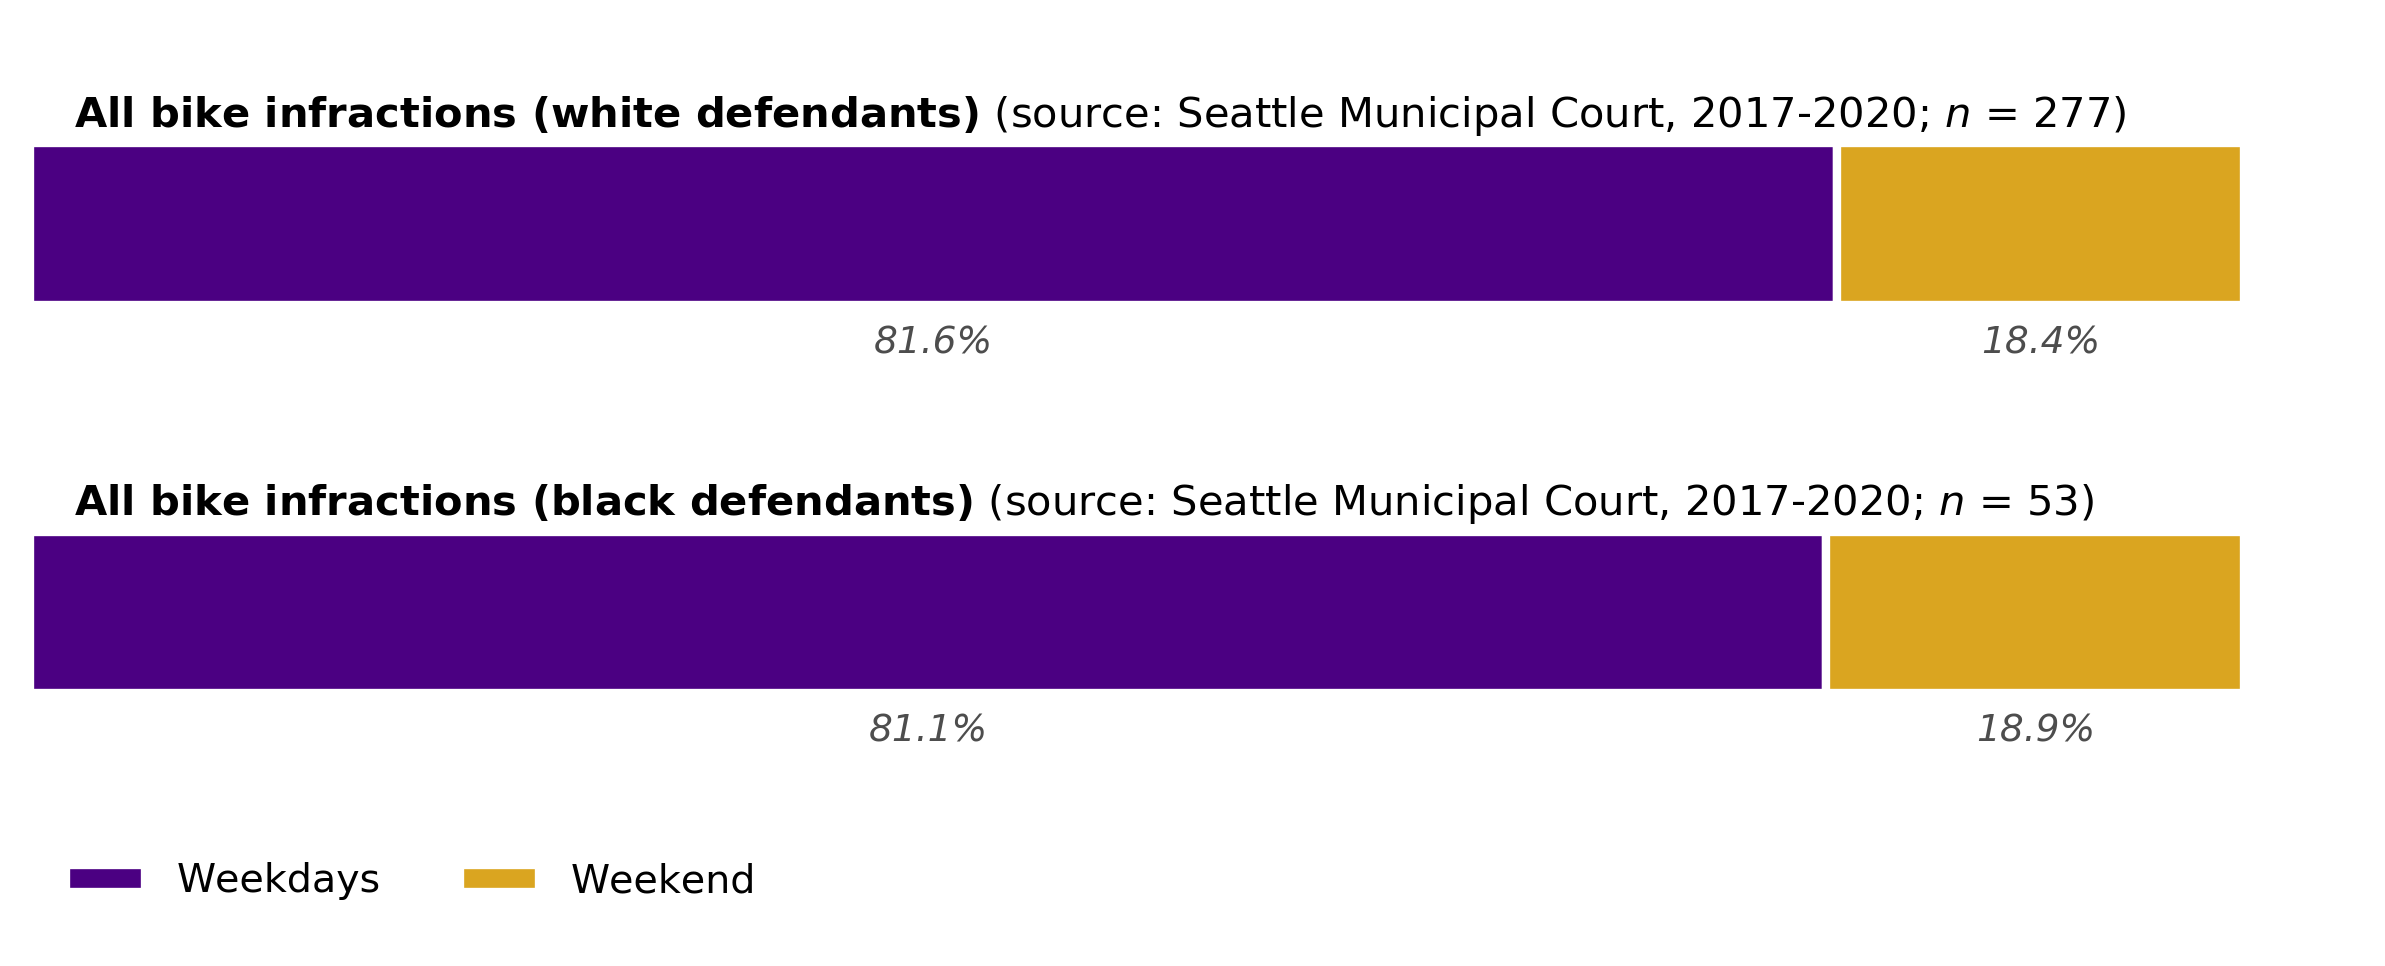

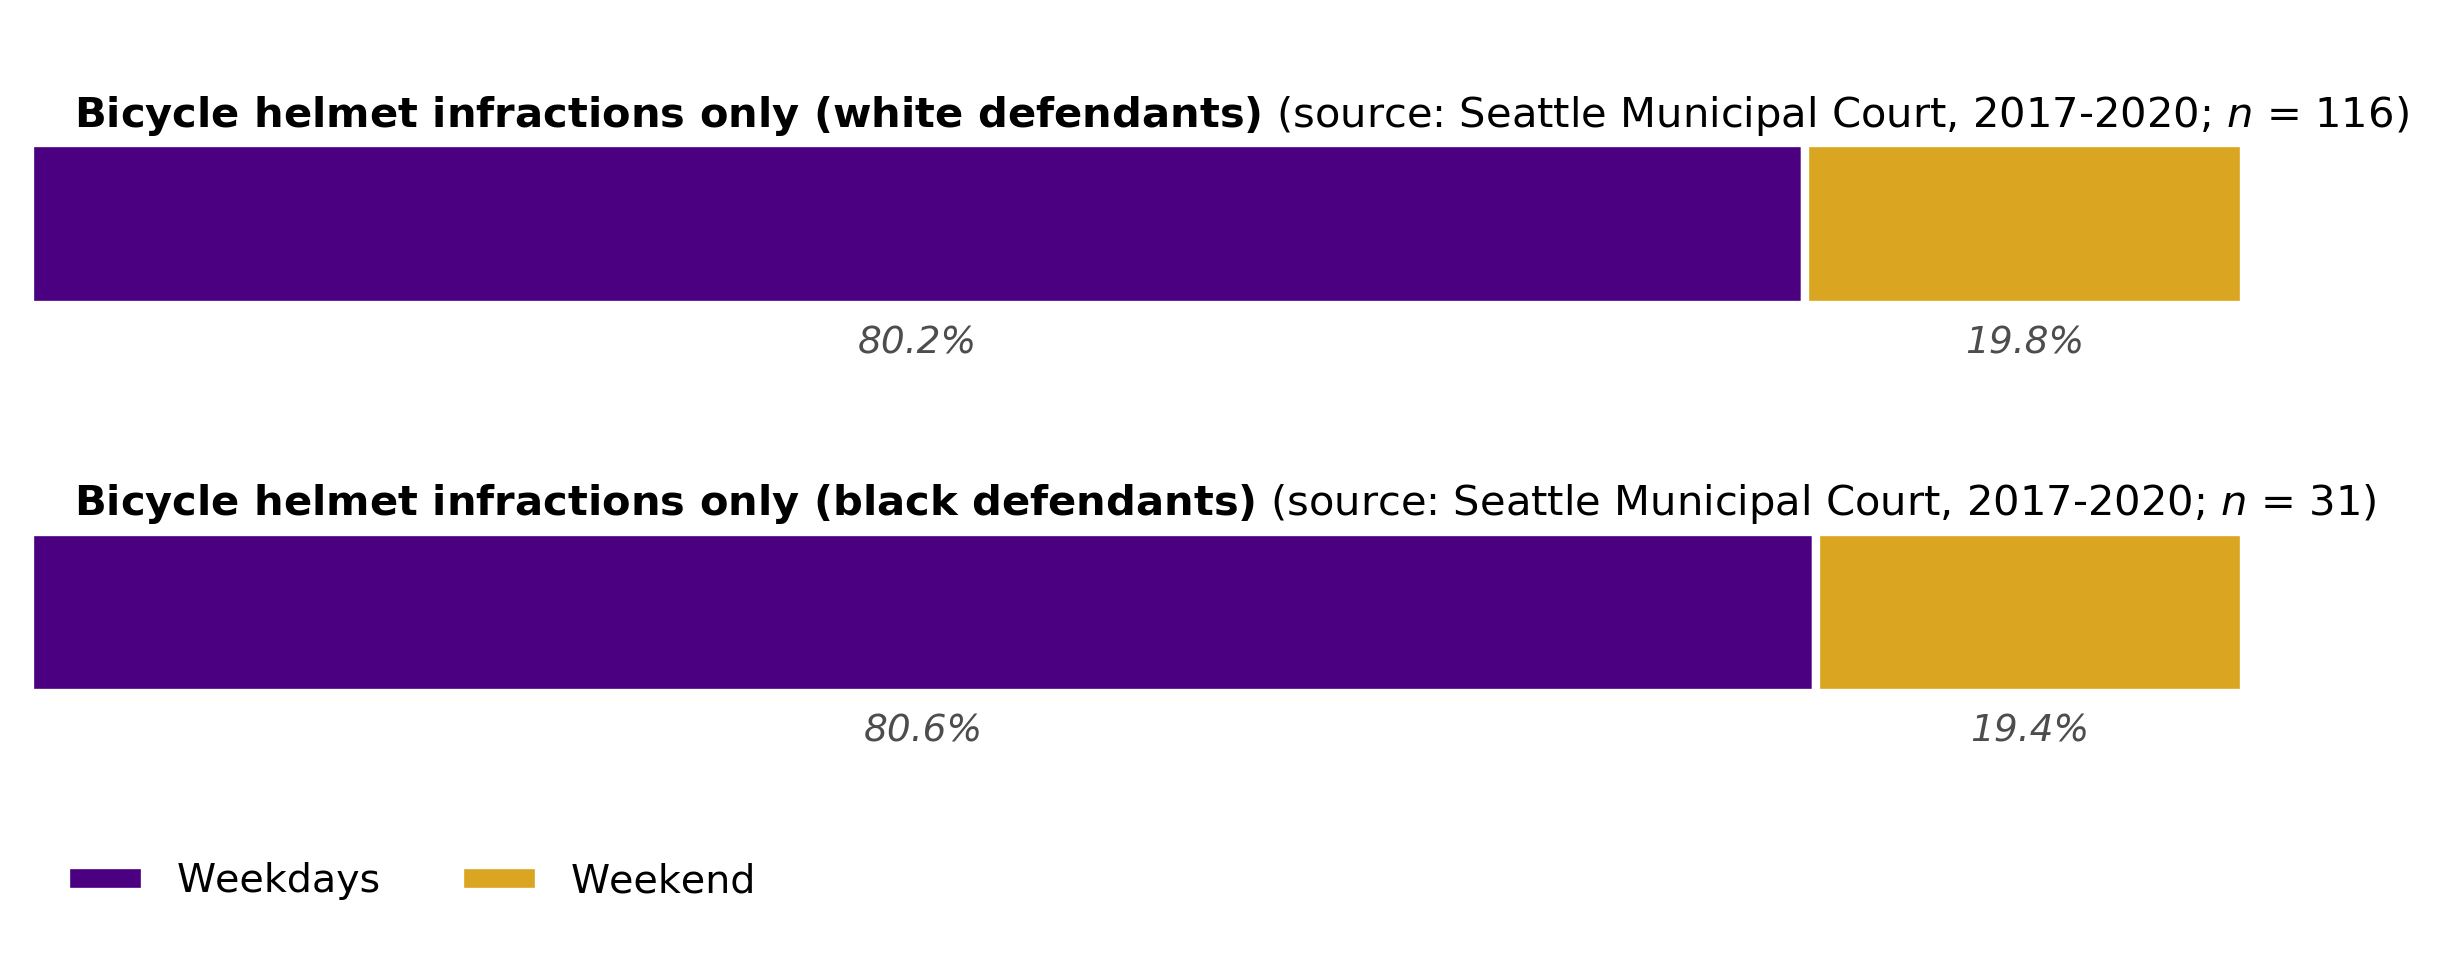

In [10]:
# analysis of weekdays in which infractions were written

dows_all_white = histogram([dt.dayofweek for dt in seattle_mc_new['Violation Date'][seattle_mc_new['Defendant Race'] == 'W']],
                           bins=arange(0,8))
dows_all_black = histogram([dt.dayofweek for dt in seattle_mc_new['Violation Date'][seattle_mc_new['Defendant Race'] == 'B']],
                           bins=arange(0,8))
dows_helmet_white = histogram([dt.dayofweek for dt in seattle_mc_new_helmet['Violation Date'][seattle_mc_new_helmet['Defendant Race'] == 'W']],
                           bins=arange(0,8))
dows_helmet_black = histogram([dt.dayofweek for dt in seattle_mc_new_helmet['Violation Date'][seattle_mc_new_helmet['Defendant Race'] == 'B']],
                           bins=arange(0,8))

which_infractions = [r'$\bf{All~bike~infractions~',r'$\bf{Bicycle~helmet~infractions~only~']
for r_idx, dows in enumerate([[dows_all_white,dows_all_black],[dows_helmet_white,dows_helmet_black]]):
    plt.figure(figsize=(10,4),facecolor='w')

    labels = ['Weekdays','Weekend']
    colors = ['indigo','goldenrod']
    bump_label = [0,0]
    label_star = [0,0]
    y_baseline = 2.2
    widths = array([100*sum(dows[0][0][0:5])/sum(dows[0][0]),100*sum(dows[0][0][5:7])/sum(dows[0][0])])
    h1 = plt.barh(y_baseline,widths,height=0.5,left=array([0,*cumsum(widths)[:-1]]),color=colors,edgecolor='w',linewidth=2.0)
    for w_idx, w in enumerate(widths):
        plt.text(array([0,*cumsum(widths)[:-1]])[w_idx] + w/2 + bump_label[w_idx], y_baseline-0.4,'{0:.1f}%{1}'.format(w,'*'*label_star[w_idx]),
                 horizontalalignment='center',fontstyle='italic',color='0.3',fontsize=9)
    plt.text(2,y_baseline+0.3,which_infractions[r_idx] + r'(white~defendants)}$ (source: Seattle Municipal Court, 2017-2020; ' \
                              + '$n$ = {0})'.format(sum(dows[0][0])))

    bump_label = [0,0]
    label_star = [0,0]
    y_baseline = 1.0
    widths = array([100*sum(dows[1][0][0:5])/sum(dows[1][0]),100*sum(dows[1][0][5:7])/sum(dows[1][0])])
    h2 = plt.barh(y_baseline,widths,height=0.5,left=array([0,*cumsum(widths)[:-1]]),color=colors,edgecolor='w',linewidth=2.0)
    for w_idx, w in enumerate(widths):
        plt.text(array([0,*cumsum(widths)[:-1]])[w_idx] + w/2 + bump_label[w_idx], y_baseline-0.4,'{0:.1f}%{1}'.format(w,'*'*label_star[w_idx]),
                 horizontalalignment='center',fontstyle='italic',color='0.3',fontsize=9)
    plt.text(2,y_baseline+0.3,which_infractions[r_idx] + r'(black~defendants)}$ (source: Seattle Municipal Court, 2017-2020; ' \
                              + '$n$ = {0})'.format(sum(dows[1][0])))

    plt.ylim([0,2.8])

    plt.legend(h2,labels,ncol=5,frameon=False,loc='lower left',prop={'size':9.5});
    plt.xticks([]); plt.yticks([])
    plt.gca().spines['top'].set_visible(False); plt.gca().spines['bottom'].set_visible(False); plt.gca().spines['left'].set_visible(False); plt.gca().spines['right'].set_visible(False)


### Historical record of bike infractions by year

**Source: Seattle Times, "The cop and the courier: Seattle’s top-ticketing officer, and its most-ticketed cyclist" by Gene Balk (July 15, 2015)**

In [11]:
from IPython.display import Image
display(Image(url='https://static.seattletimes.com/wp-content/uploads/2015/07/aed058d2-2b4d-11e5-bef9-f00a1a6eacb9-1560x1133.jpg',
              width=500,height=300))

seattle_hist_all = pd.Series(index=arange(1990,2015),
                             data=[143,149,172,125,161,157,142,179,101,141,150,152,159,
                                   197,195,215,478,289,577,525,656,733,405,501,270])

# add more recent infraction totals from Seattle Municipal Court summary table online (since deleted, but transcribed above)
for year in seattle_summaries.index:
    seattle_hist_all[int(year)] = seattle_summaries['Total'][year]

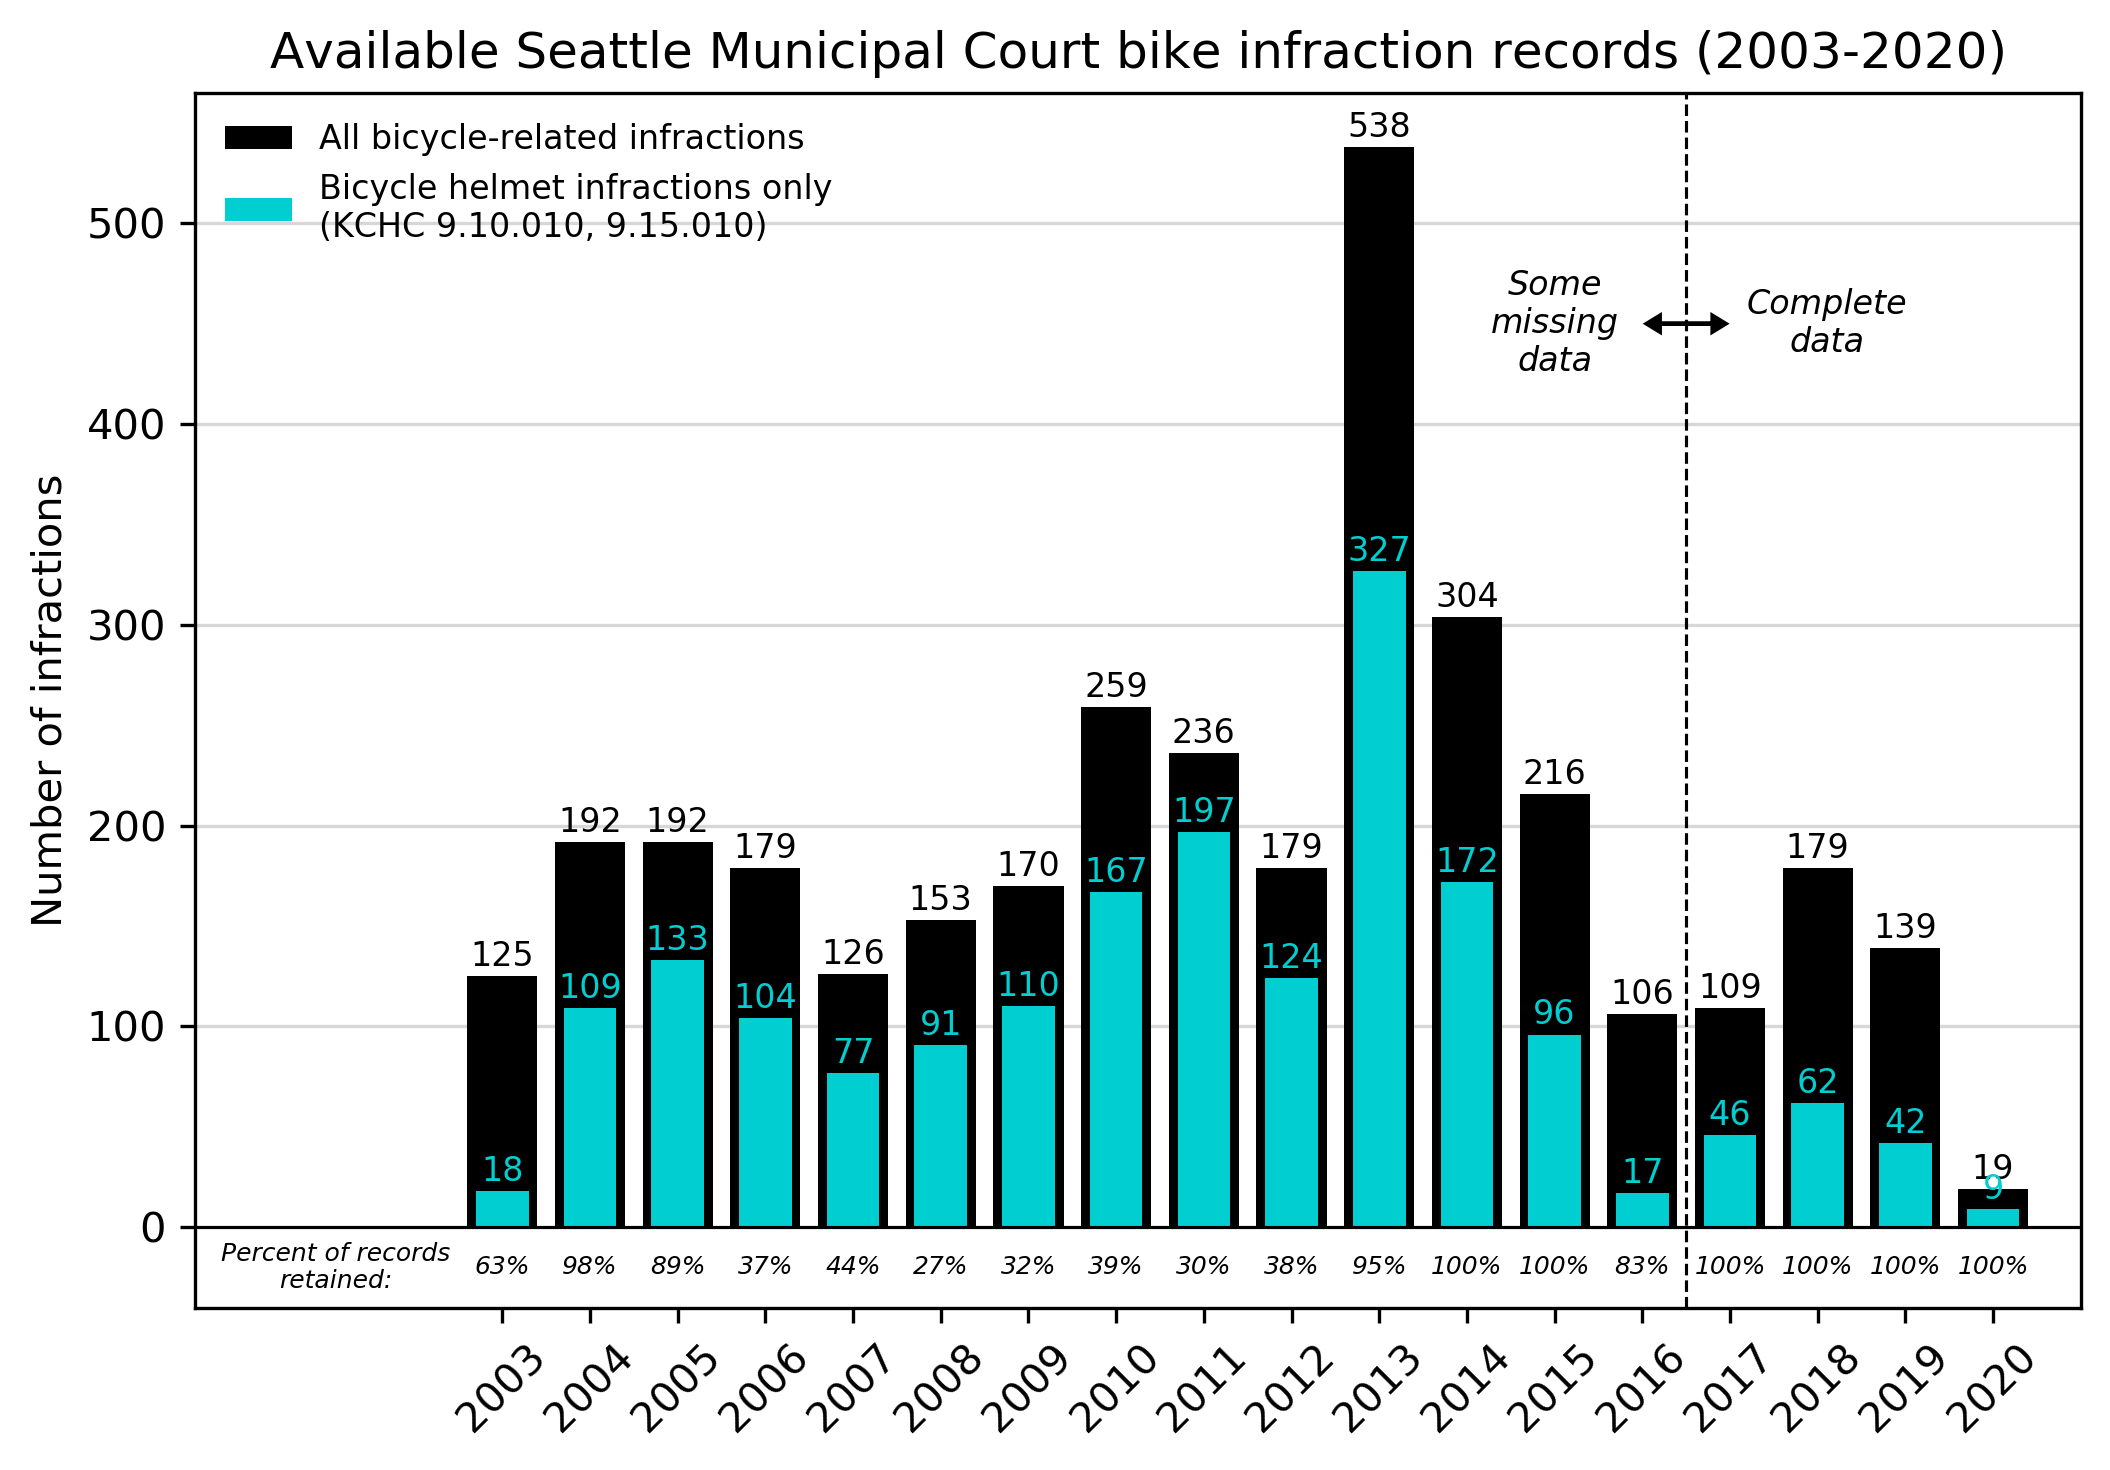

In [19]:
# plot time distribution of older (2003-2016), incomplete Seattle bike infraction records

plt.figure(figsize=(14,5),facecolor='w')
plt.subplot(1,2,1)

old_years_hist = histogram(seattle_mc_old['Violation Date'].dt.year,bins=arange(2003,2018))
x = old_years_hist[1][:-1]
y = old_years_hist[0]
plt.grid(axis='y',alpha=0.5,zorder=1)
plt.bar(x,y,color='k',zorder=2,label='All bicycle-related infractions')
for i, y_val in enumerate(y): plt.text(x[i],y_val+5,str(y_val),c='k',
                                       fontweight='regular',fontsize=8,horizontalalignment='center')
    
new_years_hist = histogram(seattle_mc_new['Violation Date'].dt.year,bins=arange(2017,2022))
x = new_years_hist[1][:-1]
y = new_years_hist[0]
plt.grid(axis='y',zorder=1)
plt.bar(x,y,color='k',zorder=2)
for i, y_val in enumerate(y): plt.text(x[i],y_val+5,str(y_val),c='k',
                                       fontweight='regular',fontsize=8,horizontalalignment='center')

old_years_helmet_hist = histogram(seattle_mc_old_helmet['Violation Date'].dt.year,bins=arange(2003,2018))
x = old_years_helmet_hist[1][:-1]
y = old_years_helmet_hist[0]
plt.bar(x,y,color='darkturquoise',zorder=3,width=0.6,label='Bicycle helmet infractions only\n(KCHC 9.10.010, 9.15.010)')
for i, y_val in enumerate(y): plt.text(x[i],y_val+5,str(y_val),c='darkturquoise',
                                       fontweight='regular',fontsize=8,horizontalalignment='center')
    
new_years_helmet_hist = histogram(seattle_mc_new_helmet['Violation Date'].dt.year,bins=arange(2017,2022))
x = new_years_helmet_hist[1][:-1]
y = new_years_helmet_hist[0]
plt.bar(x,y,color='darkturquoise',zorder=3,width=0.6)
for i, y_val in enumerate(y): plt.text(x[i],y_val+5,str(y_val),c='darkturquoise',
                                       fontweight='regular',fontsize=8,horizontalalignment='center')  
    
old_ylims = plt.ylim()
plt.plot([2016.5,2016.5],[-40,old_ylims[1]],c='k',ls='--',lw=0.75)
plt.arrow(2016.5,450,0.3,0,shape='full',head_length=0.15,head_width=8,color='k')
plt.arrow(2016.5,450,-0.3,0,shape='full',head_length=0.15,head_width=8,color='k')
plt.text(2018.1,450,'Complete\ndata',horizontalalignment='center',verticalalignment='center',style='italic',size=8)
plt.text(2015.0,450,'Some\nmissing\ndata',horizontalalignment='center',verticalalignment='center',style='italic',size=8)

plt.plot([1999.5,2021],[0,0],c='k',lw=0.75,zorder=4)
plt.ylim([-40,old_ylims[1]])
plt.xlim([1999.5,2021])

for year in arange(2003,2021):
    if year <= 2016:
        avail = old_years_hist[0][where(old_years_hist[1] == year)][0]
    elif year >= 2017:
        avail = new_years_hist[0][where(new_years_hist[1] == year)][0]
    frac_avail = min(100,100*avail/seattle_hist_all.loc[year])
    plt.text(year,-20,'{0:.0f}%'.format(frac_avail),horizontalalignment='center',verticalalignment='center',
             style='italic',size=6,color='k')
plt.text(2001.1,-20,'Percent of records\nretained:',horizontalalignment='center',verticalalignment='center',
         style='italic',color='k',size=6)

plt.legend(frameon=False,fontsize=8)
plt.xticks(arange(2003,2021),rotation=45)
plt.ylabel('Number of infractions')
plt.title('Available Seattle Municipal Court bike infraction records (2003-2020)')
plt.tight_layout()

